# License Plate Localization Algorithm 
This Algorithm runs on the PYNQ FPGA Board , it onlt use OpenCV, MatplotLib etc. So, it also work well in the Anaconda-Jupyter-Notebook at PC!

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2

##  Reading the Image from same directory where this notebook project is at!

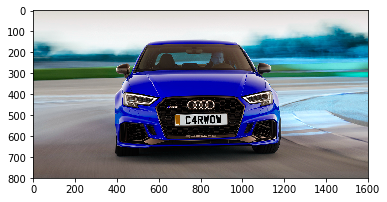

In [21]:
#img = Image.open('embossed_numberplate.jpg')
img = cv2.imread('./car_1.jpg')

plt.imshow(img)

# Image Processing Operation
## Color Conversion, Noise Removal and Equalize Histogram Operation

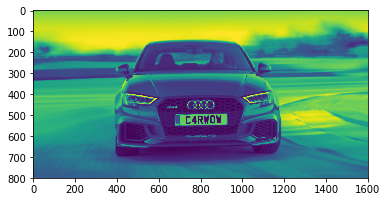

In [22]:
# convert the image into grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Noise removal with iterative bilateral filter(removes noise while preserving edges)
noise_removal = cv2.bilateralFilter(img_gray,9,75,75)
# Histogram equalisation for better results
equal_histogram = cv2.equalizeHist(noise_removal)
plt.imshow(equal_histogram)

## Morphological Operation and Thresholding

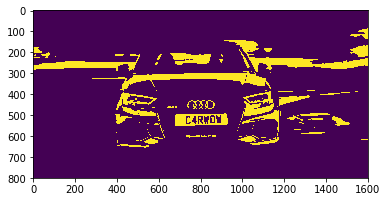

In [23]:
# Morphological opening with a rectangular structure element
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(15,5))
morph_image = cv2.morphologyEx(equal_histogram,cv2.MORPH_OPEN,kernel,iterations=15)
# Image subtraction(Subtracting the Morphed image from the histogram equalised Image)
sub_morp_image = cv2.subtract(equal_histogram,morph_image)
# Thresholding the image
ret,thresh_image = cv2.threshold(sub_morp_image,0,255,cv2.THRESH_OTSU)
plt.imshow(thresh_image)

## Edge Detection and Dilation of Image

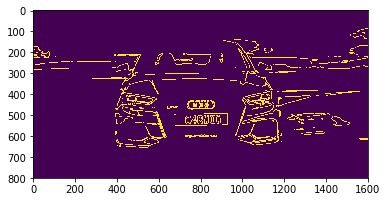

In [24]:
# Applying Canny Edge detection
canny_image = cv2.Canny(thresh_image,250,255)
canny_image = cv2.convertScaleAbs(canny_image)
# dilation to strengthen the edges
kernel = np.ones((3,3), np.uint8)
# Creating the kernel for dilation
dilated_image = cv2.dilate(canny_image,kernel,iterations=1)
plt.imshow(dilated_image)

# Localizing License Plate using the Contouring Method

10
8.30232558139535
4.7407407407407405
4.98


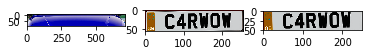

In [25]:
# Finding Contours in the image based on edges
new,contours, hierarchy = cv2.findContours(dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours= sorted(contours, key = cv2.contourArea, reverse = True)[:10]
# Sort the contours based on area ,so that the number plate will be in top 10 contours
n = 230
print(len(contours))
for c in contours:
    peri = 0.03*cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, peri, True)
    x,y,w,h = cv2.boundingRect(approx)
    final = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    if len(approx) == 4:
        screenCnt = approx
        x1,y1,w1,h1 = cv2.boundingRect(screenCnt)
        ratio = w/h
        print(ratio)
        
        crop = img[y1:y1+h1, x1:x1+w1]
            #cv2.imwrite()
        n = n+1
        plt.subplot(n),plt.imshow(crop)

# Showing the Localized Image - License Plate

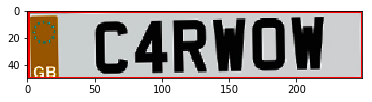

In [26]:
plt.imshow(crop)

# Original image with the bounding boxes

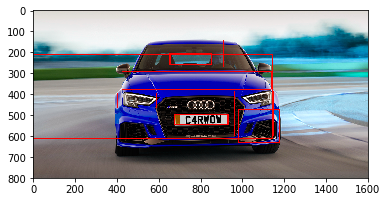

In [27]:
plt.imshow(img)

##  This Localized License Plate image can be used for next steps "Segmentation and Recognition of License Plates"

### This is all on "Localization of License Plate"
Though accuracy of license plate localization is dependent on the picture illumination, quality ,  orientation of license paltes etc.
For the OpenCV based localization there are other algorithms also which work on number of scenario of weather, quality and orientation of license plate etc. 

#### And now for localizaiton many Machine Learning algorithms as Yolov3-license plate are also used, so it can localize license plate in poor quality, weather etc.